In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [103]:
df = pd.read_csv('merged_data_DT.csv')

In [104]:
df.head()

,passenger_count,trip_distance,RatecodeID,payment_type,tip_amount,total_amount,trip_duration,date,PRCP,SNOW,pickup_borough,dropoff_borough,Tavg,tpep_pickup_time,tpep_dropoff_time,trip_fare,tip_given
0,1,3.79,1.0,1,4.06,24.36,20.483333,2022-12-14,0.00,0.0,Manhattan,Manhattan,35.0,08:57:09,09:17:38,20.3,1
1,1,2.08,1.0,1,2.56,15.36,10.816667,2022-08-28,0.00,0.0,Manhattan,Manhattan,77.5,13:22:42,13:33:31,12.8,1
2,3,2.08,1.0,1,2.00,18.30,17.166667,2022-07-29,0.10,0.0,Manhattan,Manhattan,78.5,18:28:00,18:45:10,16.3,1
3,1,18.24,2.0,1,0.00,60.60,28.983333,2022-07-26,0.00,0.0,Queens,Manhattan,76.0,00:01:06,00:30:05,60.6,0
4,2,9.12,1.0,1,0.00,41.60,32.916667,2022-04-08,0.03,0.0,Queens,Manhattan,57.0,12:38:17,13:11:12,41.6,0


In [105]:
df.drop(columns=['PRCP', 'SNOW', 'Tavg', 'tip_amount', 'total_amount', 'RatecodeID', 'pickup_borough', 'dropoff_borough'], inplace=True)

In [106]:
df.head()

,passenger_count,trip_distance,payment_type,trip_duration,date,tpep_pickup_time,tpep_dropoff_time,trip_fare,tip_given
0,1,3.79,1,20.483333,2022-12-14,08:57:09,09:17:38,20.3,1
1,1,2.08,1,10.816667,2022-08-28,13:22:42,13:33:31,12.8,1
2,3,2.08,1,17.166667,2022-07-29,18:28:00,18:45:10,16.3,1
3,1,18.24,1,28.983333,2022-07-26,00:01:06,00:30:05,60.6,0
4,2,9.12,1,32.916667,2022-04-08,12:38:17,13:11:12,41.6,0


In [107]:
features = ['passenger_count', 'trip_distance', 'trip_duration', 'payment_type', 'trip_fare']
X = df[features]
y = df['tip_given']

In [108]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

In [109]:
balance_after_smote = y_sm.value_counts(normalize=True)
print("Balance after SMOTE:\n", balance_after_smote)

Balance after SMOTE:
 tip_given
1    0.5
0    0.5
Name: proportion, dtype: float64


In [110]:
# Splitting the dataset into training and testing sets after applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [111]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

X_train = scaler.transform(X_train) #transform training data
X_test = scaler.transform(X_test) #transform validation data

In [112]:
SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(X_train, y_train)

y_pred = SVM_Model1.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9286438958403788
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1460
           1       0.88      1.00      0.93      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



c:\Users\varun\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


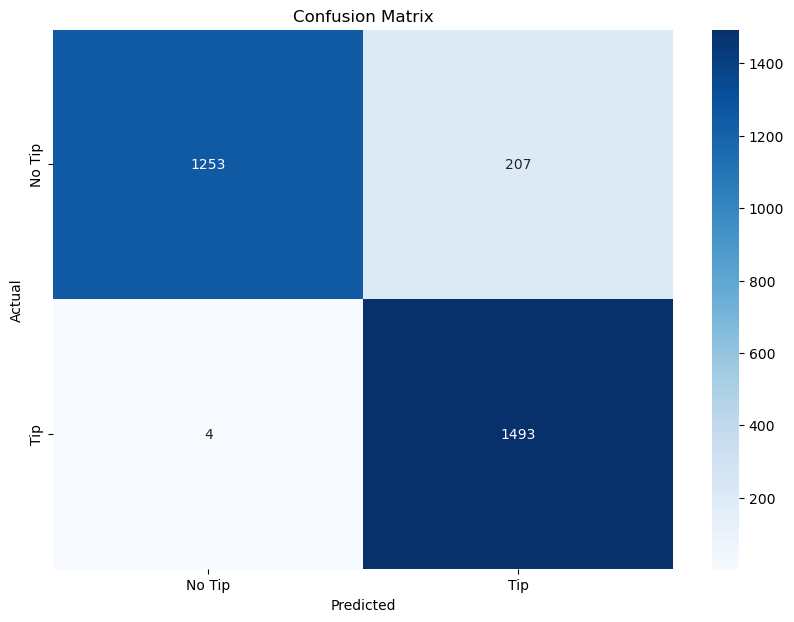

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


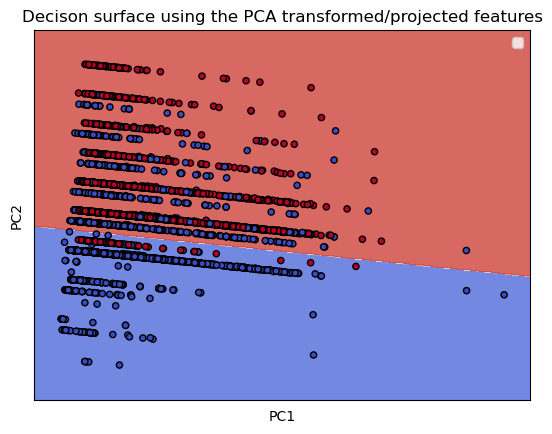

In [122]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


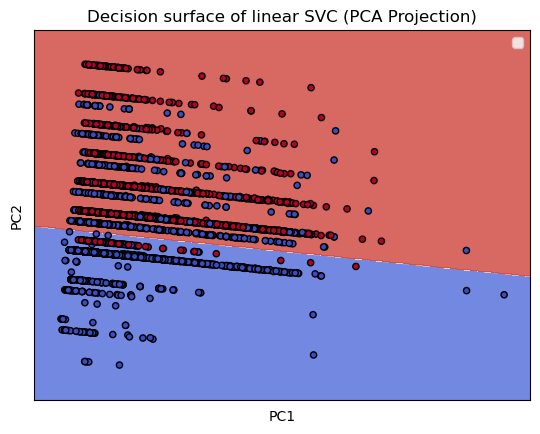

In [124]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

# ... (Your code for loading data into 'X' and 'y')

# Reduce to 2 principal components
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear', C=1)
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
title = 'Decision surface of linear SVC (PCA Projection)'  # More descriptive title

# Prepare grid (no changes needed here)
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotting (no changes needed here)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


In [ ]:
SVM_Model1=LinearSVC(C=50)
SVM_Model1.fit(X_train, y_train)

y_pred = SVM_Model1.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9296584376056815
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1460
           1       0.88      1.00      0.93      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



c:\Users\varun\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


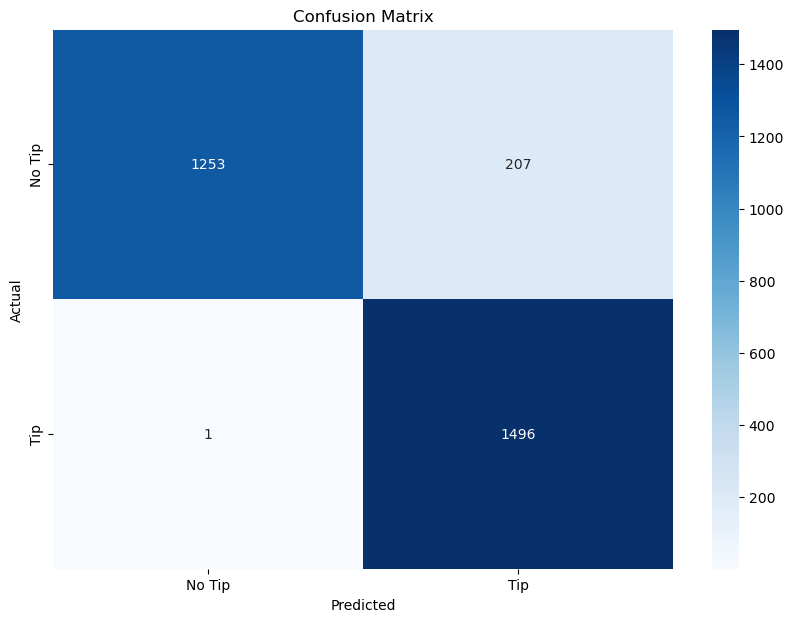

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
SVM_Model1=LinearSVC(C=200)
SVM_Model1.fit(X_train, y_train)

y_pred = SVM_Model1.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9256002705444707
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1460
           1       0.87      1.00      0.93      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.92      0.93      2957
weighted avg       0.93      0.93      0.93      2957



c:\Users\varun\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


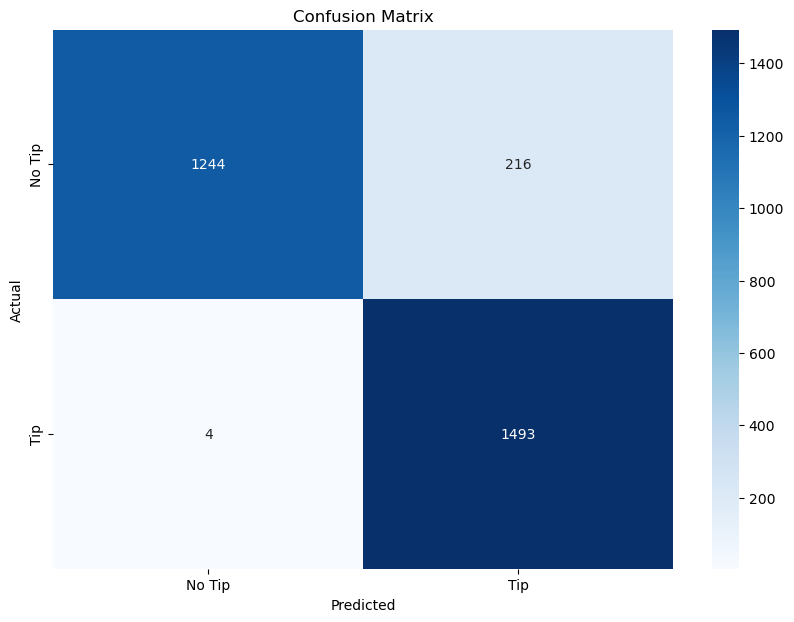

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import sklearn

SVM_Model2=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

y_pred = SVM_Model2.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9303347987825499
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1460
           1       0.88      1.00      0.94      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



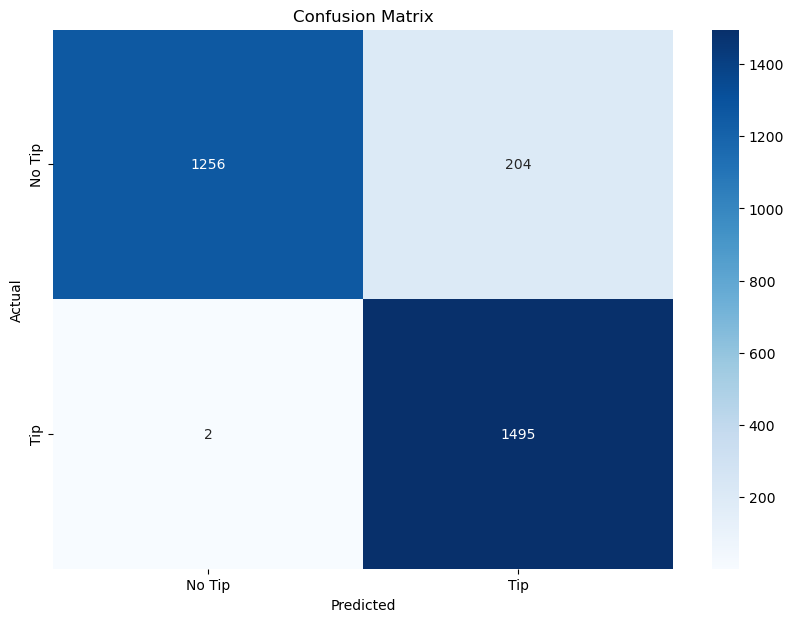

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import sklearn

SVM_Model2=sklearn.svm.SVC(C=10, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

y_pred = SVM_Model2.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9323638823131553
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      1460
           1       0.88      1.00      0.94      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



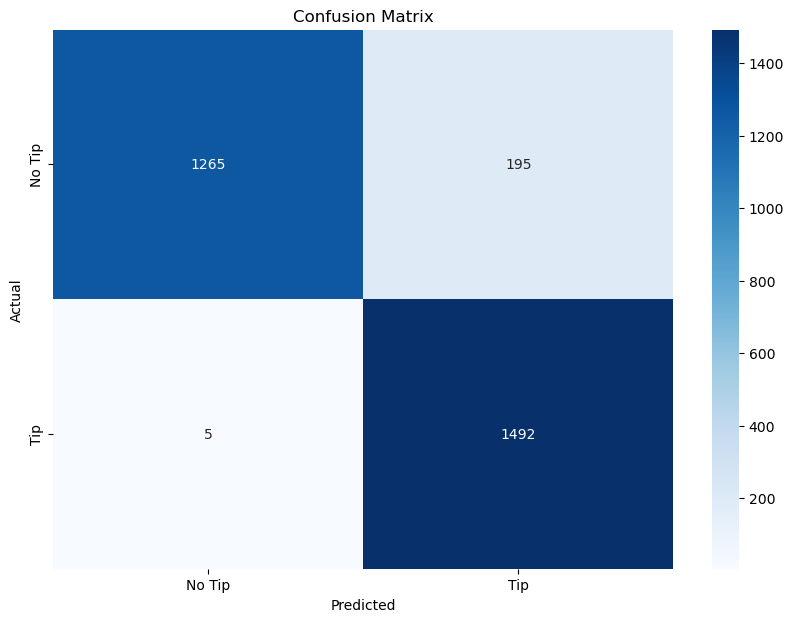

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import sklearn

SVM_Model2=sklearn.svm.SVC(C=100, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(X_train, y_train)

y_pred = SVM_Model2.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9310111599594183
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1460
           1       0.88      0.99      0.94      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



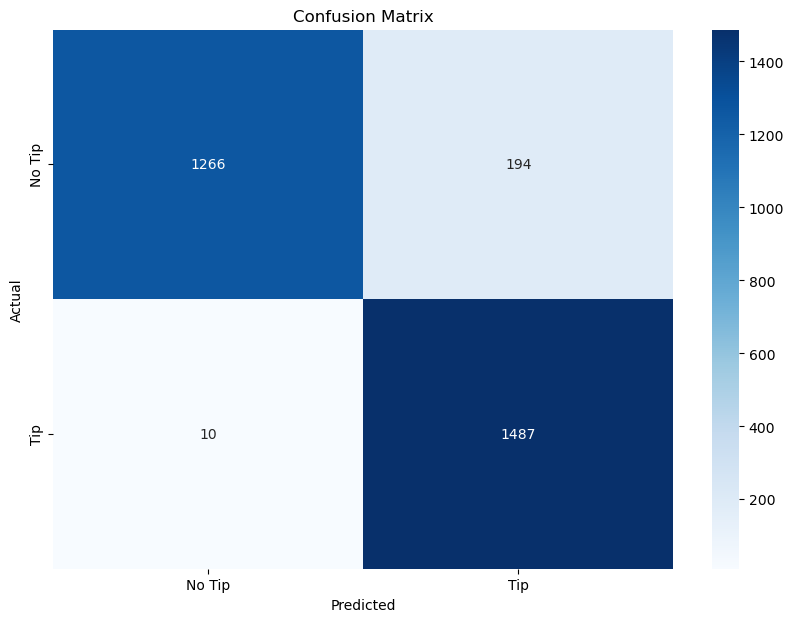

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
SVM_Model3=sklearn.svm.SVC(C=1, kernel='poly', degree=3, gamma="auto")
SVM_Model3.fit(X_train, y_train)

y_pred = SVM_Model3.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9293202570172472
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1460
           1       0.88      1.00      0.93      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



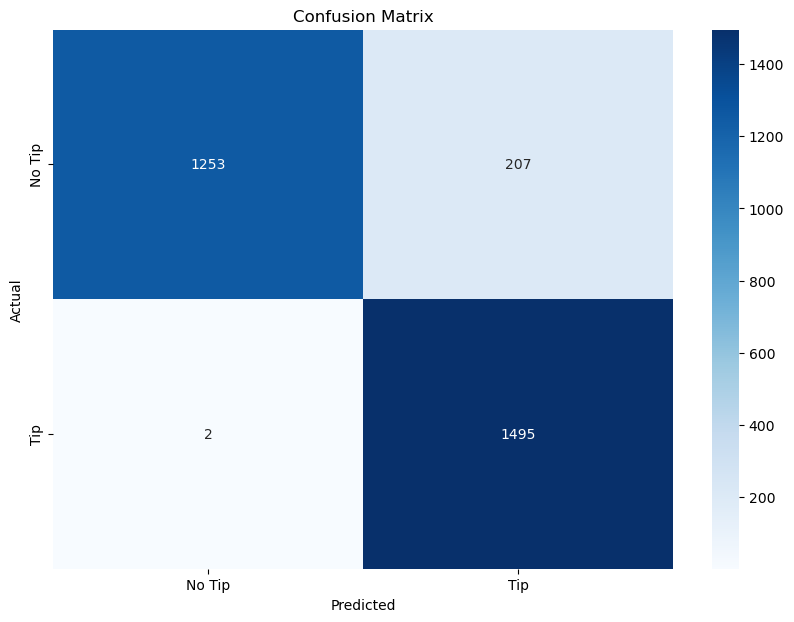

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
SVM_Model3=sklearn.svm.SVC(C=0.5, kernel='poly', degree=3, gamma="auto")
SVM_Model3.fit(X_train, y_train)

y_pred = SVM_Model3.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9293202570172472
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1460
           1       0.88      1.00      0.93      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



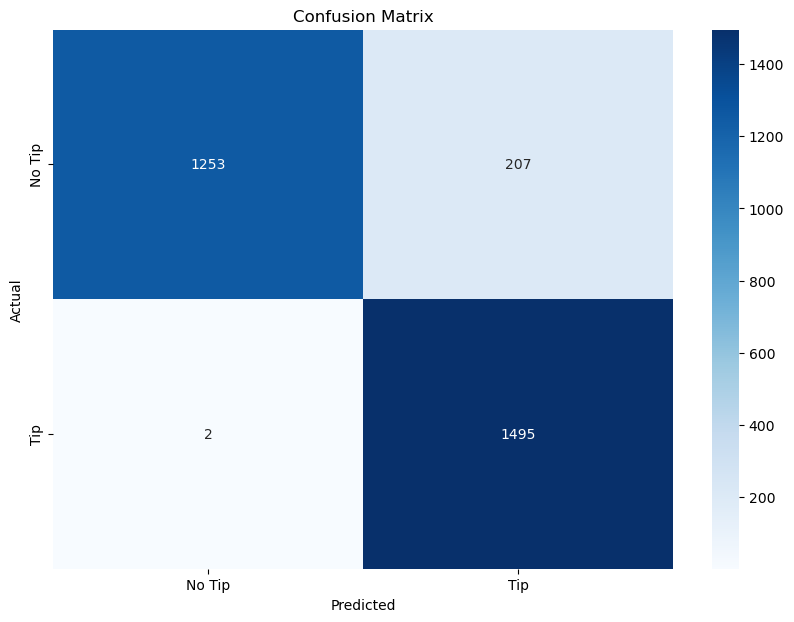

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
SVM_Model3=sklearn.svm.SVC(C=3, kernel='poly', degree=3, gamma="auto")
SVM_Model3.fit(X_train, y_train)

y_pred = SVM_Model3.predict(X_test)

# Evaluating the classifier on the balanced dataset
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9293202570172472
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1460
           1       0.88      1.00      0.93      1497

    accuracy                           0.93      2957
   macro avg       0.94      0.93      0.93      2957
weighted avg       0.94      0.93      0.93      2957



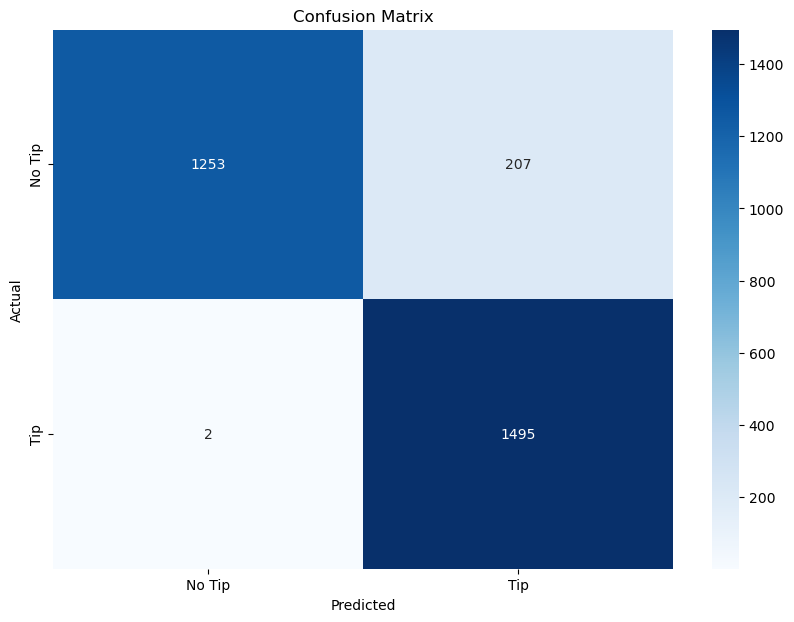

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Tip", "Tip"], yticklabels=["No Tip", "Tip"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


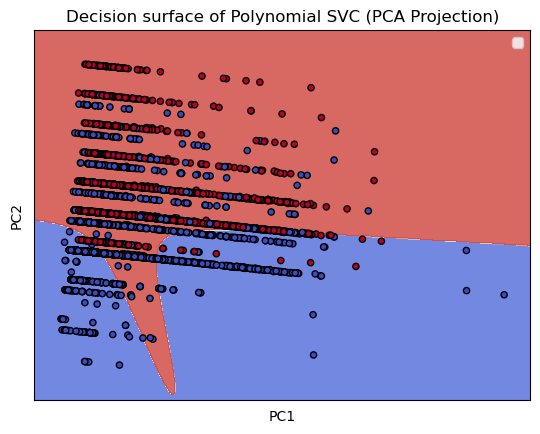

In [125]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

# ... (Your code for loading data into 'X' and 'y')

# Reduce to 2 principal components
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(C=3, kernel='poly', degree=3, gamma="auto")
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
title = 'Decision surface of Polynomial SVC (PCA Projection)'  # More descriptive title

# Prepare grid (no changes needed here)
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotting (no changes needed here)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


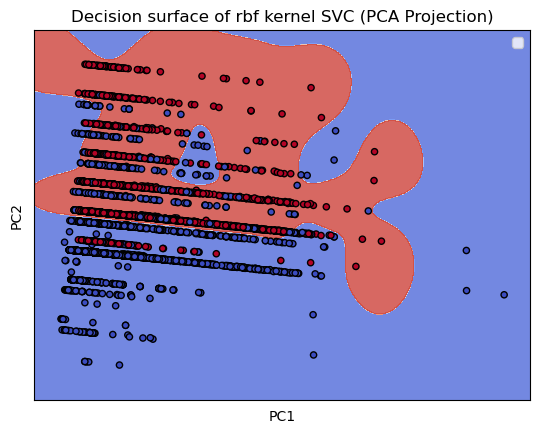

In [126]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

# ... (Your code for loading data into 'X' and 'y')

# Reduce to 2 principal components
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = sklearn.svm.SVC(C=10, kernel='rbf', degree=3, gamma="auto")
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
title = 'Decision surface of rbf kernel SVC (PCA Projection)'  # More descriptive title

# Prepare grid (no changes needed here)
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotting (no changes needed here)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()